In [39]:
import cv2
import numpy as np
from imageio.v2 import imread
import matplotlib.pyplot as plt

# Gaussian Noise

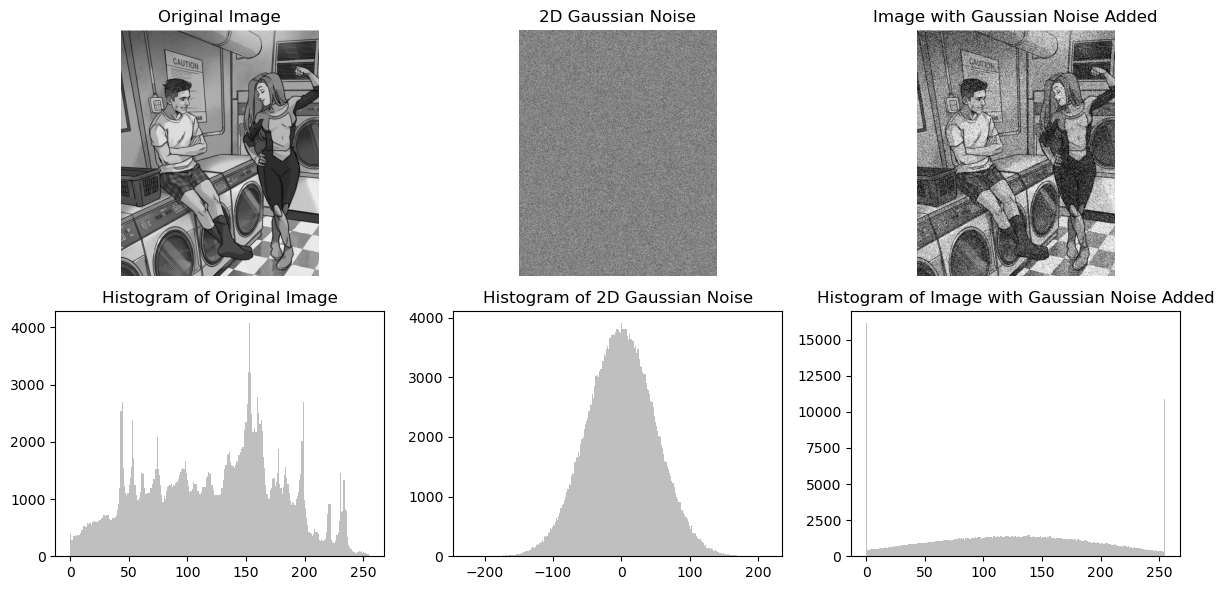

In [30]:
img = imread('Images/Invincible/05.jpg')
img_gray = img[:, :, 1] 

noise = np.random.normal(0, 50, img_gray.shape)  # Mean = 0, Std = 50

img_noised = np.clip(img_gray + noise, 0, 255).astype(np.uint8)

cv2.imwrite("gaussian_noise.png", img_noised)

fig, axes = plt.subplots(2, 3, figsize=(12, 6))

titles = ["Original Image", "2D Gaussian Noise", "Image with Gaussian Noise Added"]
images = [img_gray, noise, img_noised]

for i in range(3):
    axes[0, i].imshow(images[i], cmap='gray')
    axes[0, i].set_title(titles[i])
    axes[0, i].axis("off")

for i, img_data in enumerate(images):
    axes[1, i].hist(img_data.ravel(), bins=256, color='gray', alpha=0.5)
    axes[1, i].set_title(f"Histogram of {titles[i]}")

plt.tight_layout()
plt.show()

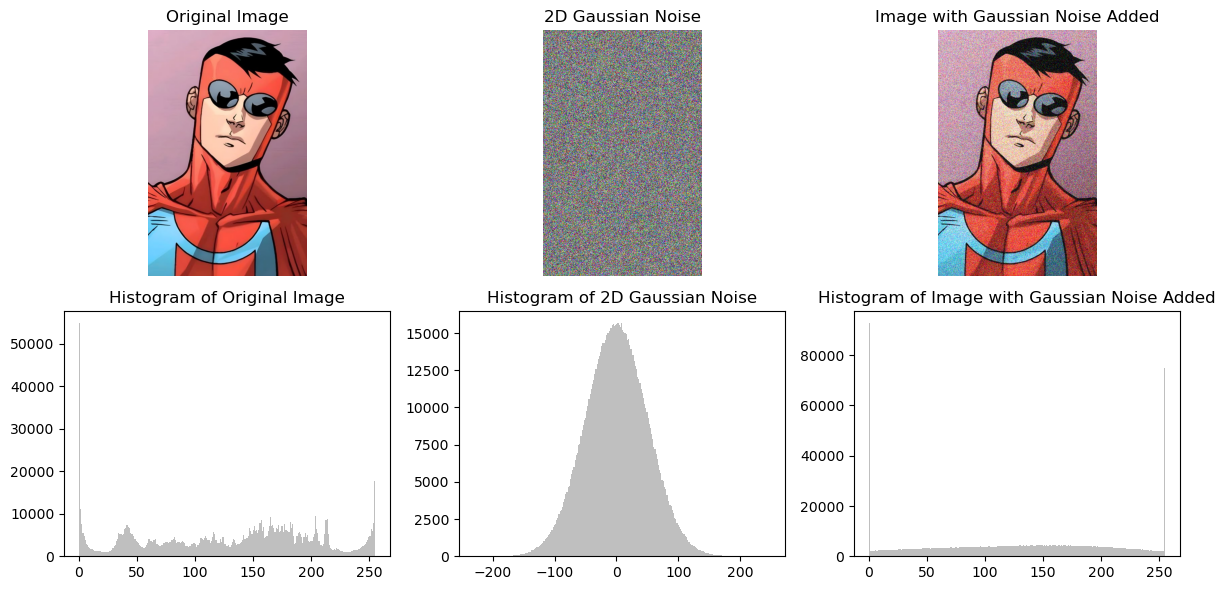

In [40]:
img_bgr = cv2.imread("Images/Invincible/02.jpg")

# Convert BGR to RGB for correct display in Matplotlib
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)

noise = np.random.normal(0, 50, img_bgr.shape)

img_noised = np.clip(img_bgr + noise, 0, 255).astype(np.uint8)

cv2.imwrite("gaussian_noise.png", img_noised)

# Convert to RGB for correct display in Matplotlib
img_noised_rgb = cv2.cvtColor(img_noised, cv2.COLOR_BGR2RGB)

fig, axes = plt.subplots(2, 3, figsize=(12, 6))

titles = ["Original Image", "2D Gaussian Noise", "Image with Gaussian Noise Added"]
images = [img_rgb, noise.astype(np.uint8), img_noised_rgb]  # Use RGB images for Matplotlib

for i in range(3):
    axes[0, i].imshow(images[i])
    axes[0, i].set_title(titles[i])
    axes[0, i].axis("off")

for i, img_data in enumerate([img_bgr, noise, img_noised]):
    axes[1, i].hist(img_data.ravel(), bins=256, color='gray', alpha=0.5)
    axes[1, i].set_title(f"Histogram of {titles[i]}")

plt.tight_layout()
plt.show()

# Salt & Pepper Noise

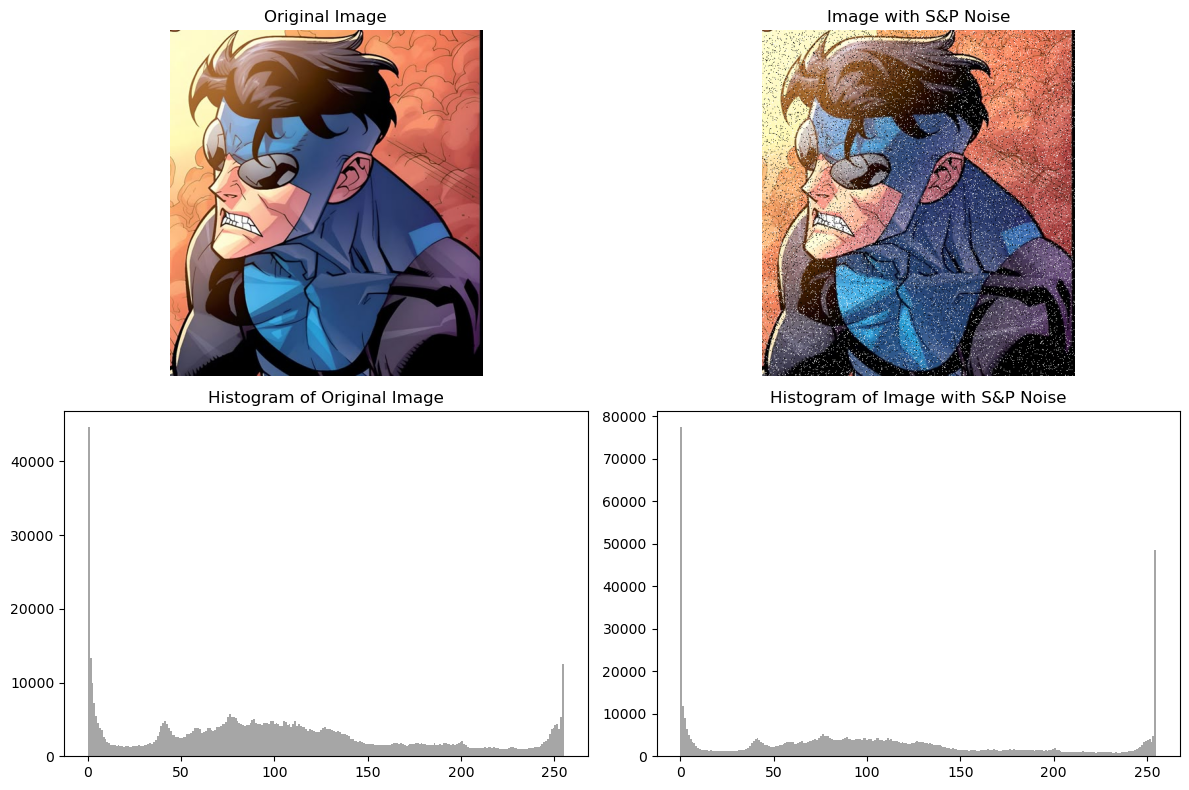

In [33]:
img = cv2.imread("Images/Invincible/03.jpg")  # OpenCV reads in BGR format

img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

img_size = img.shape[0] * img.shape[1]

noise_percentage = 0.1  # 10%
noise_size = int(noise_percentage * img_size)

random_indices = np.random.choice(img_size, noise_size, replace=False)

img_noised = img.copy()

# Flatten the image for easier manipulation
flat_img = img_noised.reshape(-1, 3)

binary_noise = np.random.choice([0, 1], size=noise_size)

# Create a noise array where 0 maps to black (0,0,0) and 1 maps to white (255,255,255)
noise = np.array([[0, 0, 0] if bn == 0 else [255, 255, 255] for bn in binary_noise])

# Apply noise to the selected pixels
flat_img[random_indices] = noise

img_noised = flat_img.reshape(img.shape)

img_noised_rgb = cv2.cvtColor(img_noised, cv2.COLOR_BGR2RGB)

cv2.imwrite("sp_noise.png", img_noised)

fig, axes = plt.subplots(2, 2, figsize=(12, 8))

images = [img_rgb, img_noised_rgb]  # Use RGB images for display
titles = ["Original Image", "Image with S&P Noise"]

for i in range(2):
    axes[0, i].imshow(images[i])
    axes[0, i].set_title(titles[i])
    axes[0, i].axis("off")

for i, img_data in enumerate(images):
    axes[1, i].hist(img_data.ravel(), bins=256, color='gray', alpha=0.7)
    axes[1, i].set_title(f"Histogram of {titles[i]}")

plt.tight_layout()
plt.show()

# Impulse Noise

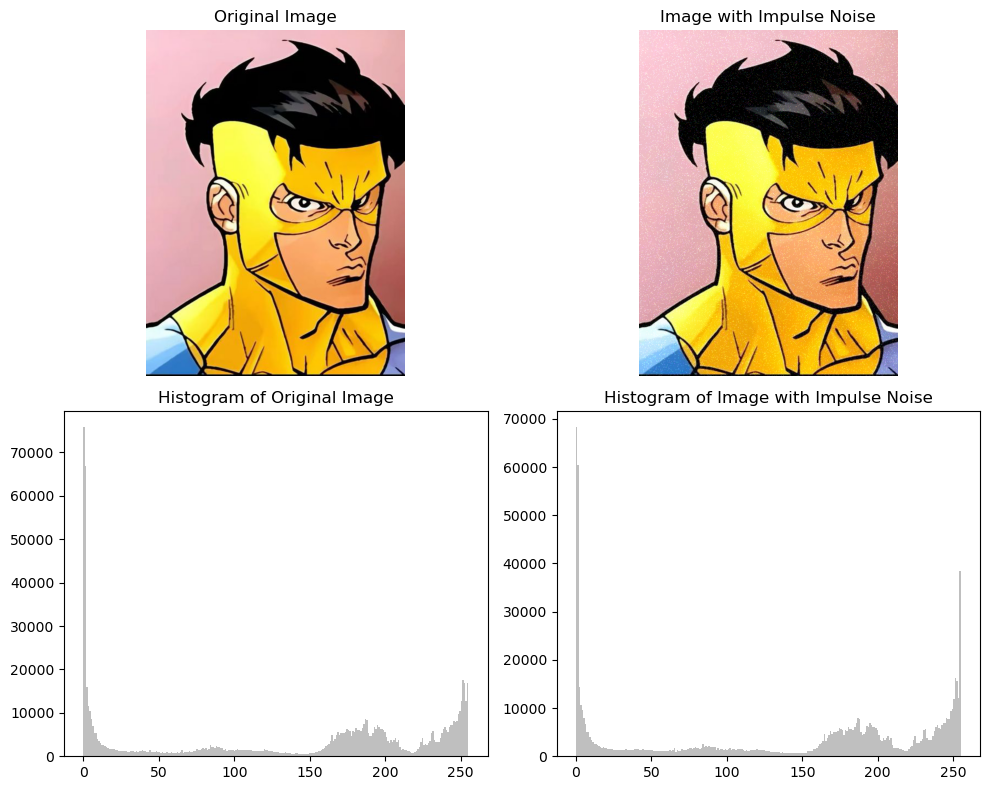

In [43]:
img = imread('Images/Invincible/04.jpg')

# Define noise intensity range
noise_min = 0.2 * np.min(img)
noise_max = 0.3 * np.max(img)

num_noisy_pixels = int(0.10 * img.shape[0] * img.shape[1])

# Generate noise values within the specified range
noise_sample = np.random.uniform(noise_min, noise_max, (num_noisy_pixels, 3))  # 3 channels

zeros = np.zeros((img.shape[0] * img.shape[1] - num_noisy_pixels, 3))

noise = np.vstack([noise_sample, zeros])
np.random.shuffle(noise)

noise = noise.reshape(img.shape)

img_noised = np.clip(img + noise, 0, 255).astype(np.uint8)

cv2.imwrite("impulse_noise.png", cv2.cvtColor(img_noised, cv2.COLOR_RGB2BGR))

images = [img, img_noised]
titles = ["Original Image", "Image with Impulse Noise"]

fig, axes = plt.subplots(2, 2, figsize=(10, 8))
for i in range(2):
    axes[0, i].imshow(images[i])
    axes[0, i].set_title(titles[i])
    axes[0, i].axis("off")

for i, img_data in enumerate(images):
    axes[1, i].hist(img_data.ravel(), bins=256, color='gray', alpha=0.5)
    axes[1, i].set_title(f"Histogram of {titles[i]}")

plt.tight_layout()
plt.show()

# Rayleigh Noise

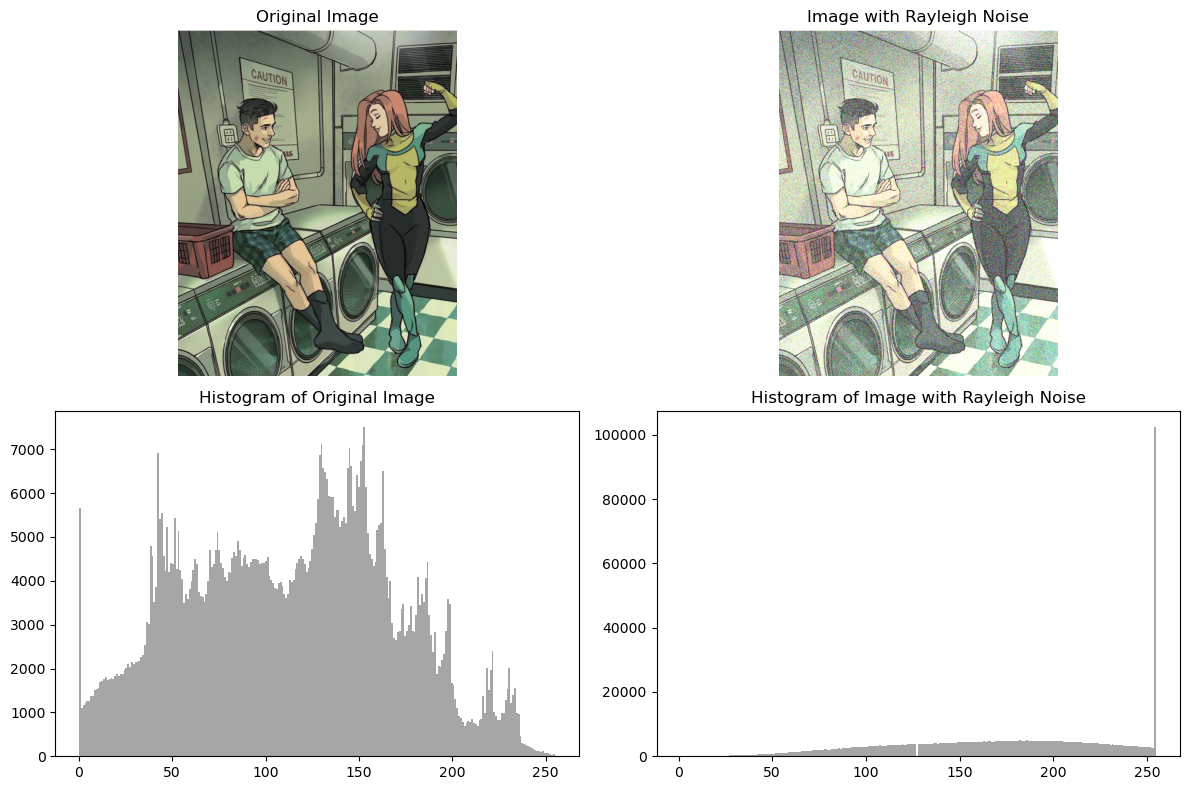

In [44]:
img = imread('Images/Invincible/05.jpg').astype(np.float32) / 255.0  

# Generate Rayleigh noise with scale parameter
scale_param = 0.2  # Adjust noise intensity
rayleigh_noise = np.random.rayleigh(scale=scale_param, size=img.shape)

img_noised = np.clip(img + rayleigh_noise, 0, 1)

# Convert back to uint8 for display and saving
img_uint8 = (img * 255).astype(np.uint8)
img_noised_uint8 = (img_noised * 255).astype(np.uint8)

cv2.imwrite("rayleigh_noise.png", cv2.cvtColor(img_noised_uint8, cv2.COLOR_RGB2BGR))

fig, axes = plt.subplots(2, 2, figsize=(12, 8))

images = [img_uint8, img_noised_uint8]
titles = ["Original Image", "Image with Rayleigh Noise"]

for i in range(2):
    axes[0, i].imshow(images[i])
    axes[0, i].set_title(titles[i])
    axes[0, i].axis("off")

for i, img_data in enumerate(images):
    axes[1, i].hist(img_data.ravel(), bins=256, color='gray', alpha=0.7)
    axes[1, i].set_title(f"Histogram of {titles[i]}")

plt.tight_layout()
plt.show()

# Erlang (Gamma) Noise

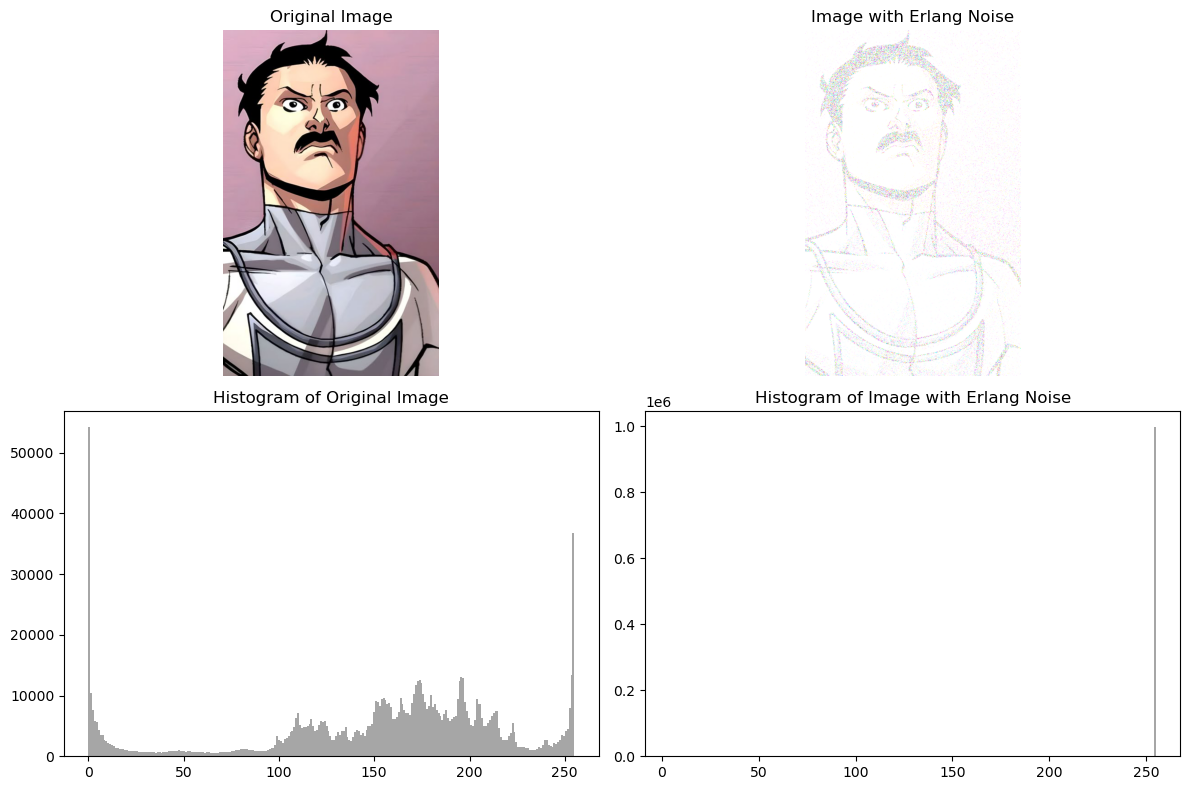

In [45]:
img = imread('Images/Invincible/06.jpg').astype(np.float32) / 255.0  

# Define Erlang (Gamma) noise parameters
a = 3  # Shape parameter (must be an integer)
b = 2.0  # Rate parameter (positive real)

erlang_noise = np.random.gamma(shape=a, scale=1/b, size=img.shape)  

img_noised = np.clip(img + erlang_noise, 0, 1)

# Convert back to uint8 for display and saving
img_uint8 = (img * 255).astype(np.uint8)
img_noised_uint8 = (img_noised * 255).astype(np.uint8)

cv2.imwrite("erlang_noise.png", cv2.cvtColor(img_noised_uint8, cv2.COLOR_RGB2BGR))

fig, axes = plt.subplots(2, 2, figsize=(12, 8))

images = [img_uint8, img_noised_uint8]
titles = ["Original Image", "Image with Erlang Noise"]

for i in range(2):
    axes[0, i].imshow(images[i])
    axes[0, i].set_title(titles[i])
    axes[0, i].axis("off")

for i, img_data in enumerate(images):
    axes[1, i].hist(img_data.ravel(), bins=256, color='gray', alpha=0.7)
    axes[1, i].set_title(f"Histogram of {titles[i]}")

plt.tight_layout()
plt.show()

# Exponential Noise

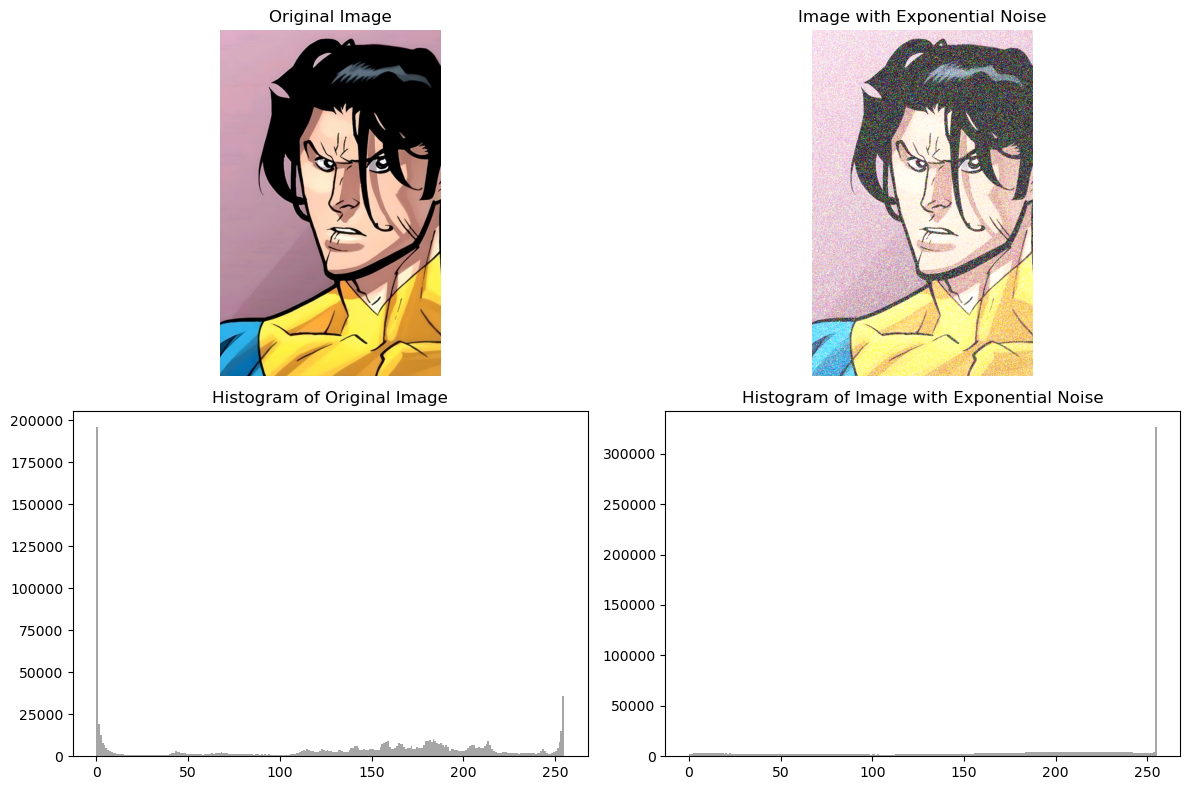

In [46]:
img = imread('Images/Invincible/07.jpg').astype(np.float32) / 255.0

# Define Exponential noise parameter
a = 0.3  # Scale parameter (mean = a, variance = a²)

exp_noise = np.random.exponential(scale=a, size=img.shape)

img_noised = np.clip(img + exp_noise, 0, 1)

img_uint8 = (img * 255).astype(np.uint8)
img_noised_uint8 = (img_noised * 255).astype(np.uint8)

cv2.imwrite("exponential_noise.png", cv2.cvtColor(img_noised_uint8, cv2.COLOR_RGB2BGR))

fig, axes = plt.subplots(2, 2, figsize=(12, 8))

images = [img_uint8, img_noised_uint8]
titles = ["Original Image", "Image with Exponential Noise"]

for i in range(2):
    axes[0, i].imshow(images[i])
    axes[0, i].set_title(titles[i])
    axes[0, i].axis("off")

for i, img_data in enumerate(images):
    axes[1, i].hist(img_data.ravel(), bins=256, color='gray', alpha=0.7)
    axes[1, i].set_title(f"Histogram of {titles[i]}")

plt.tight_layout()
plt.show()

# Uniform Noise

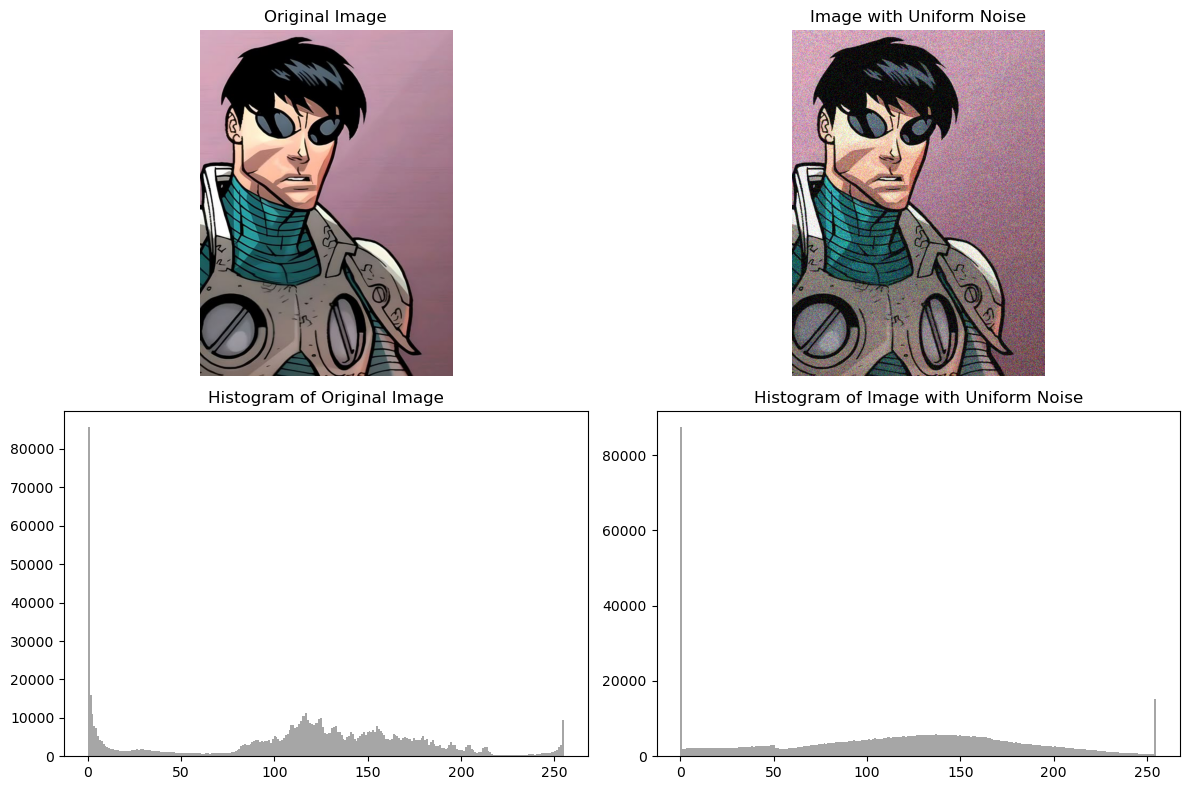

In [47]:
img = imread('Images/Invincible/08.jpg').astype(np.float32) / 255.0

# Define Uniform noise parameters
a, b = -0.2, 0.2  # Lower and upper bounds of noise

uniform_noise = np.random.uniform(a, b, size=img.shape)

img_noised = np.clip(img + uniform_noise, 0, 1)

img_uint8 = (img * 255).astype(np.uint8)
img_noised_uint8 = (img_noised * 255).astype(np.uint8)

cv2.imwrite("uniform_noise.png", cv2.cvtColor(img_noised_uint8, cv2.COLOR_RGB2BGR))

fig, axes = plt.subplots(2, 2, figsize=(12, 8))

images = [img_uint8, img_noised_uint8]
titles = ["Original Image", "Image with Uniform Noise"]

for i in range(2):
    axes[0, i].imshow(images[i])
    axes[0, i].set_title(titles[i])
    axes[0, i].axis("off")

for i, img_data in enumerate(images):
    axes[1, i].hist(img_data.ravel(), bins=256, color='gray', alpha=0.7)
    axes[1, i].set_title(f"Histogram of {titles[i]}")

plt.tight_layout()
plt.show()